<a href="https://colab.research.google.com/github/faheeem30/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:

import opendatasets as od
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data")




Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedfaheemna
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████| 1.55k/1.55k [00:00<00:00, 991kB/s]

In [3]:
import pandas as pd
data = pd.read_csv("/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


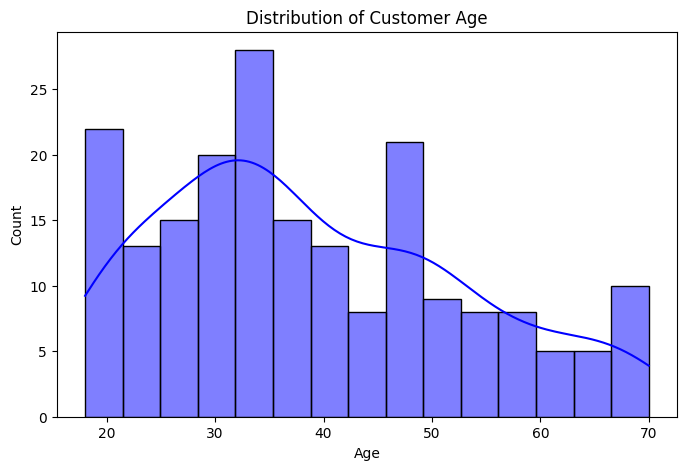

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=15, kde=True, color='blue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


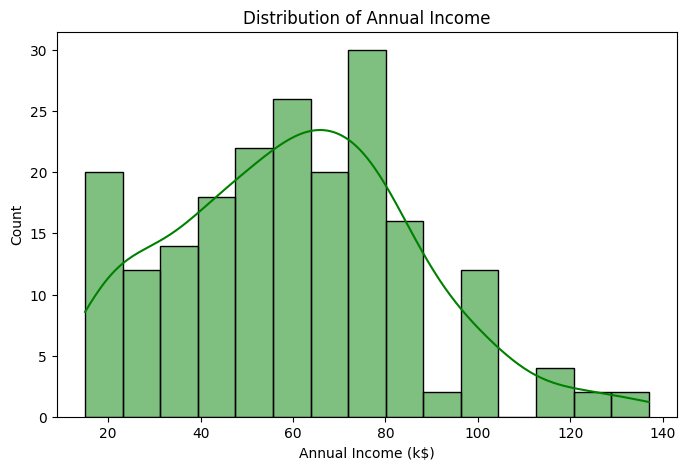

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, color='green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()


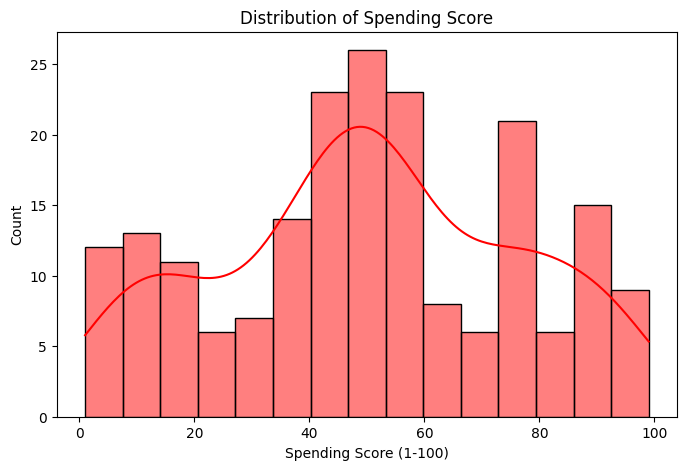

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data['Spending Score (1-100)'], bins=15, kde=True, color='red')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()


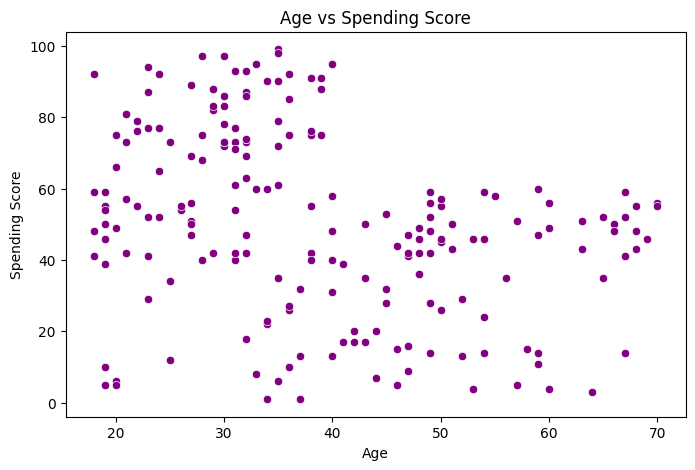

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], color='purple')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


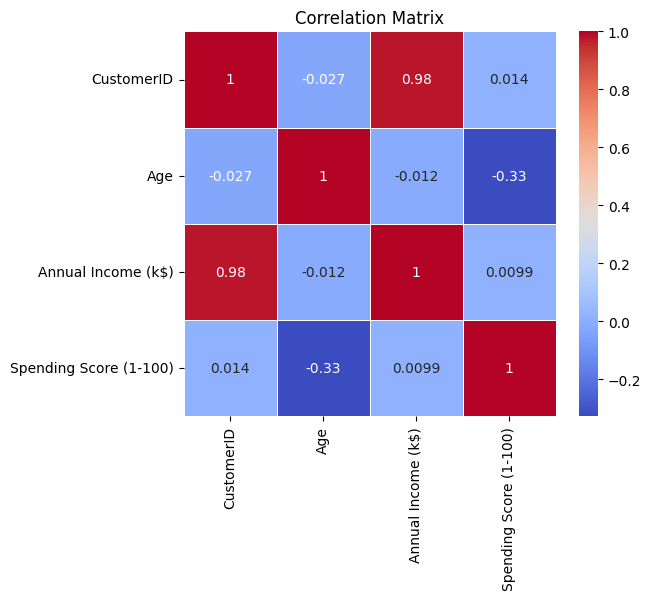

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_data = data.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [11]:
# Selecting only relevant columns

from sklearn.preprocessing import StandardScaler
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)


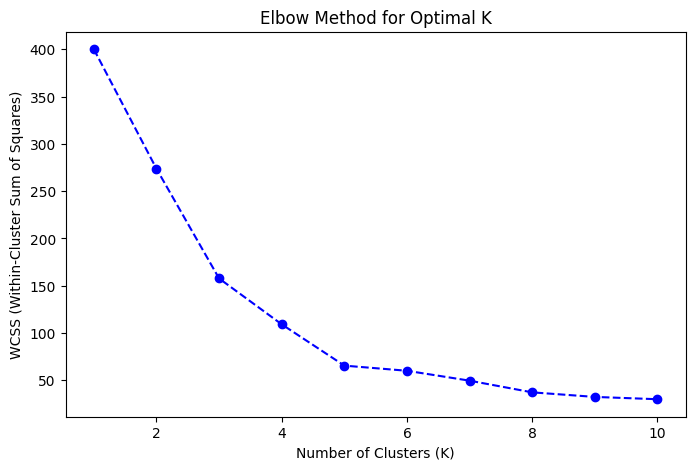

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Store WCSS for each K
K_range = range(1, 11)  # Checking K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)  # Use the normalized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [13]:
from sklearn.cluster import KMeans

# Apply K-Means with the chosen number of clusters
optimal_k = 5  # Change this based on your Elbow Method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)  # Assign clusters to customers

# Add cluster labels to the original data
data['Cluster'] = clusters
data['Cluster'].value_counts()


,count
Cluster,
0,81
1,39
3,35
4,23
2,22


In [14]:
import pandas as pd

# Convert cluster centers back to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_centers)


   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


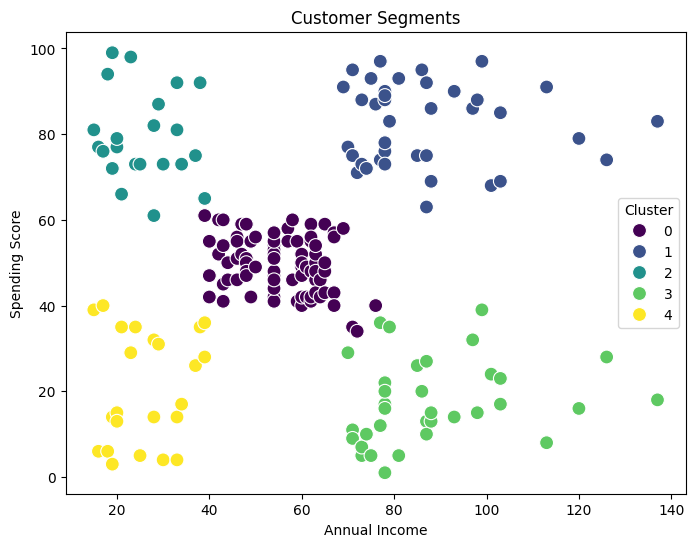

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Annual Income (k$)'],
                y=data['Spending Score (1-100)'],
                hue=data['Cluster'],
                palette='viridis',
                s=100)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()


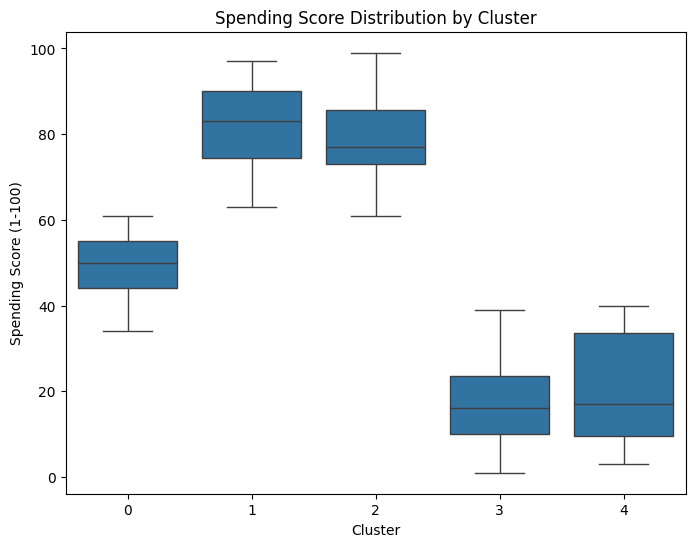

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title("Spending Score Distribution by Cluster")
plt.show()


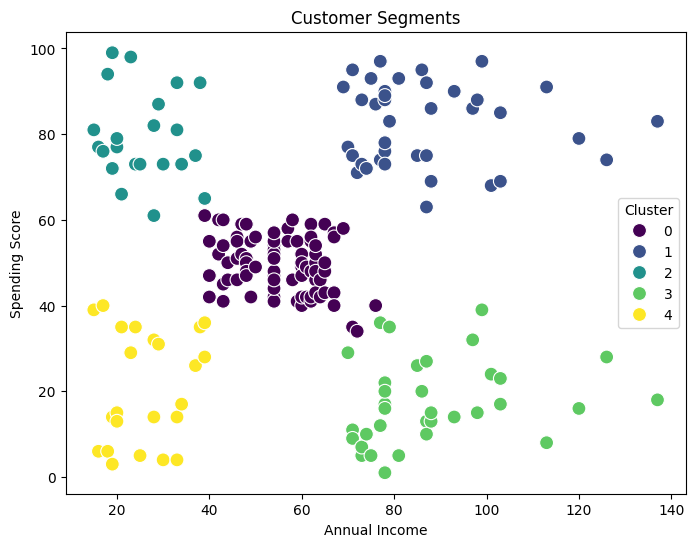

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Annual Income (k$)'],
                y=data['Spending Score (1-100)'],
                hue=data['Cluster'],
                palette='viridis',
                s=100)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()


In [18]:
import pandas as pd

# Convert cluster centers back to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_centers)


   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


<ipython-input-19-389c28207b6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data, palette='Set2')


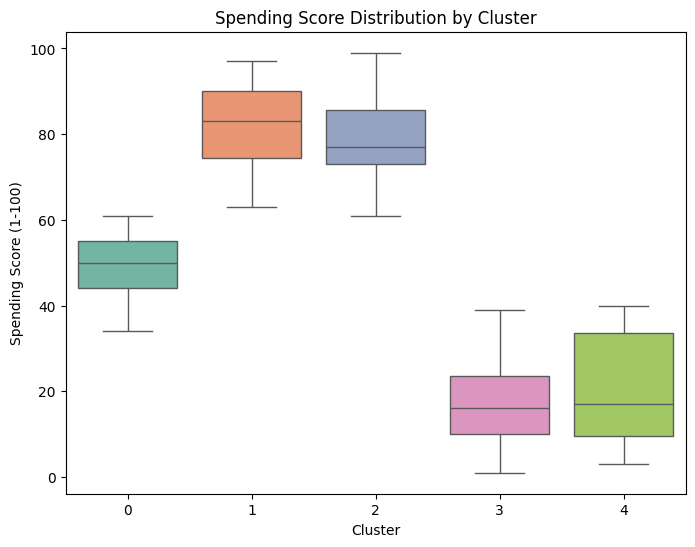

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data, palette='Set2')
plt.title("Spending Score Distribution by Cluster")
plt.show()


In [ ]:
import pandas as pd

# Convert cluster centers back to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_centers)


   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


In [24]:
segment_mapping = {
    0: '🏷 Budget Shoppers',
    1: '🔥 Impulsive Buyers',
    2: '🔵 Conservative Buyers',
    3: '💎 Luxury Customers',
    4: '🛍️ Regular Shoppers'  # Add this for Cluster 4
}

# Apply the mapping again
data['Segment'] = data['Cluster'].map(segment_mapping)

# Check unique values
print(data[['Cluster', 'Segment']].drop_duplicates())


     Cluster                Segment
0          4    🛍️ Regular Shoppers
1          2  🔵 Conservative Buyers
43         0      🏷 Budget Shoppers
123        1     🔥 Impulsive Buyers
124        3     💎 Luxury Customers


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


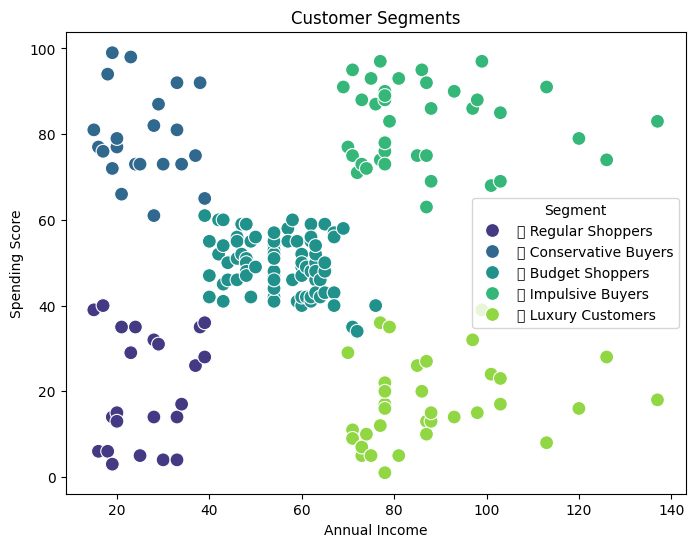

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Annual Income (k$)'],
                y=data['Spending Score (1-100)'],
                hue=data['Segment'],
                palette='viridis',
                s=100)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend(title='Segment')
plt.show()


In [26]:
# Save the dataset with clusters
data.to_csv("customer_segments.csv", index=False)


In [28]:
segment_mapping = {
    0: '🏷 Budget Shoppers',
    1: '🔥 Impulsive Buyers',
    2: '🔵 Conservative Buyers',
    3: '💎 Luxury Customers',
    4: '⚡ Unknown Segment'  # Add a default name in case of missing clusters
}

data['Segment'] = data['Cluster'].map(segment_mapping)


In [29]:
print(data['Cluster'].unique())  # Check all unique cluster values
print(data.groupby('Cluster').size())  # Count customers in each cluster


[4 2 0 1 3]
Cluster
0    81
1    39
2    22
3    35
4    23
dtype: int64


In [21]:
print(data.head())  # Check if 'Cluster' column is present


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster                Segment  
0        4    🛍️ Regular Shoppers  
1        2  🔵 Conservative Buyers  
2        4    🛍️ Regular Shoppers  
3        2  🔵 Conservative Buyers  
4        4    🛍️ Regular Shoppers  


In [27]:
from google.colab import files

# Download the file
files.download("customer_segments.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>